In [2]:
import tensorflow as tf
import pymysql as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
conn = db.connect(host='192.168.2.88', port=3306, user='zach', passwd='1qaz!QAZ', db='old')

In [4]:
cursor = conn.cursor()

In [5]:
#1734 total visits, 174 unique idvisitor,51 unique user_id
query_visits = 'SELECT * from old.matomo_log_visit;'

In [ ]:
query_users = 'SELECT '

In [6]:
df_ = pd.read_sql_query(query_visits, conn)

In [7]:
pd.options.display.max_columns = len(df_.columns)
pd.options.display.max_rows = len(df_.columns)

In [8]:
#df_ is the full dataset
#df holds the columns we want
#df_deleted holds the columns that are removed
df_

,idvisit,idsite,idvisitor,visit_last_action_time,config_id,location_ip,user_id,visit_first_action_time,visit_goal_buyer,visit_goal_converted,visitor_days_since_first,visitor_days_since_order,visitor_returning,visitor_count_visits,visit_entry_idaction_name,visit_entry_idaction_url,visit_exit_idaction_name,visit_exit_idaction_url,visit_total_actions,visit_total_interactions,visit_total_searches,referer_keyword,referer_name,referer_type,referer_url,location_browser_lang,config_browser_engine,config_browser_name,config_browser_version,config_device_brand,config_device_model,config_device_type,config_os,config_os_version,visit_total_events,visitor_localtime,visitor_days_since_last,config_resolution,config_cookie,config_director,config_flash,config_gears,config_java,config_pdf,config_quicktime,config_realplayer,config_silverlight,config_windowsmedia,visit_total_time,location_city,location_country,location_latitude,location_longitude,location_region,custom_var_k1,custom_var_v1,custom_var_k2,custom_var_v2,custom_var_k3,custom_var_v3,custom_var_k4,custom_var_v4,custom_var_k5,custom_var_v5
0,1,1,b'\xdf+\xb50\xe8\x9c\x05\xe3',2018-03-01 07:13:05,b'q|V7\xc3\x89\xf4_',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,None,2018-03-01 07:07:01,0,0,0,0,0,1,1,2.0,1,2,2,2,0,None,None,1,,en-us,Blink,CH,64.0,,,0,WIN,10,0,02:07:00,0,1536x864,1,0,0,0,0,1,0,0,0,0,365,None,us,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2,1,b'\xd2\xa6)t\x8d\x98\x01\x8a',2018-03-22 06:35:41,b'\x96v\xef\xbb\xa5e\xd8\x9f',b'o]\x00\x00',None,2018-03-22 06:35:41,0,0,156,0,1,6,1,2.0,1,2,1,1,0,None,None,1,,en-us,Blink,CH,64.0,,,0,WIN,8.1,0,12:06:16,0,1536x864,1,0,0,0,0,1,0,0,0,0,0,None,us,None,None,None,None,None,None,None,None,None,None,None,None,None
2,3,1,b'\xd2\xa6)t\x8d\x98\x01\x8a',2018-03-22 10:28:40,b'\x96v\xef\xbb\xa5e\xd8\x9f',b'o]\x00\x00',None,2018-03-22 10:23:45,0,0,156,0,1,7,1,2.0,1,3,5,5,0,None,None,1,http://206.205.101.39:8080/app/,en-us,Blink,CH,64.0,,,0,WIN,8.1,0,15:54:22,0,1536x864,1,0,0,0,0,1,0,0,0,0,296,None,us,None,None,None,None,None,None,None,None,None,None,None,None,None
3,4,1,b'\xd2\xa6)t\x8d\x98\x01\x8a',2018-03-22 12:00:48,b'\x96v\xef\xbb\xa5e\xd8\x9f',b'o]\x00\x00',None,2018-03-22 12:00:48,0,0,156,0,1,8,1,2.0,1,2,1,1,0,None,None,1,,en-us,Blink,CH,64.0,,,0,WIN,8.1,0,17:31:24,0,1536x864,1,0,0,0,0,1,0,0,0,0,0,None,us,None,None,None,None,None,None,None,None,None,None,None,None,None
4,5,1,b'U\xe5\x01@\x96\xab\xcdu',2018-03-22 13:59:42,b'MV\xde\xf7;\xc2(\xb6',b'\xce\xcd\x00\x00',None,2018-03-22 13:59:42,0,0,0,0,0,1,1,2.0,1,2,1,1,0,None,None,1,,en-us,Blink,CH,65.0,,,0,MAC,10.13,0,10:00:12,0,1280x800,1,0,0,0,0,1,0,0,0,0,0,None,us,None,None,None,None,None,None,None,None,None,None,None,None,None
5,6,1,b'\xda[\xae\x19j\xa9y#',2018-03-22 17:57:57,"b'\x9e,\x1b\x88\x00\xed\xe72'",b'l\x1f\x00\x00',None,2018-03-22 17:57:57,0,0,0,0,0,1,1,2.0,1,2,1,1,0,None,None,1,,en-us,Blink,CH,64.0,,,0,WIN,10,0,13:58:29,0,1536x864,1,0,0,0,0,1,0,0,0,0,0,None,us,None,None,None,None,None,None,None,None,None,None,None,None,None
6,7,1,b'z\xa8\x17\xfa\xd4\xd3\xbf\x14',2018-03-22 18:15:03,b'\xb1/\xcf\xf5F+\xb7\t',b'\xce\xcd\x00\x00',None,2018-03-22 18:15:03,0,0,0,0,0,1,1,2.0,1,2,1,1,0,None,None,1,,en-us,WebKit,SF,11.0,,,0,MAC,10.13,0,14:15:34,0,1440x900,1,0,1,0,1,1,0,0,0,0,0,None,us,None,None,None,None,None,None,None,None,None,None,None,None,None
7,8,1,b'\xa2\xdb\x10\xd8\xf5{\xc1\xac',2018-03-22 19:26:40,b'\xa5\xd2\xcb\xc6G\xe8\xb5\xa9',b'\xce\xcd\x00\x00',None,2018-03-22 19:26:40,0,0,0,0,0,1,1,2.0,1,2,1,1,0,None,None,1,,en-us,Blink,CH,64.0,,,0,WIN,10,0,15:27:03,0,1920x1080,1,0,0,0,0,1,0,0,0,0,0,None,us,None,None,None,None,None,None,None,None,None,None,None,None,None
8,9,1,b'\xa2\xdb\x10\xd8\xf5{\xc1\xac',2018-03-22 22:04:03,b'\xa5\xd2\xcb\xc6G\xe8\xb5\xa9',b'\xce\xcd\x00\x00',None,2018-03-22 22:04:03,0,0,0,0,1,2,1,2.0,1,2,1,1,0,None,None,1,,en-us,Blink,CH,64.0,,,0,WIN,10,0,18:04:30,0,1366x768,1,0,0,0,0,1,0,0,0,0,0,None,us,None,None,None,None,None,None,None,None

In [9]:
df_deleted = df_[['location_browser_lang', 'config_browser_engine', 'config_browser_name', 
              'config_browser_version', 'config_device_brand', 'config_device_model', 
              'config_device_type','config_resolution', 'config_cookie', 'config_director',
              'config_flash', 'config_os', 'config_gears', 'config_java', 'config_pdf', 
              'config_quicktime', 'config_realplayer', 'config_silverlight', 'config_windowsmedia',
              'location_city', 'location_country','location_latitude', 
              'location_longitude', 'location_region', 'custom_var_k1', 'custom_var_v1', 
              'custom_var_k2', 'custom_var_v2', 'custom_var_k3', 'custom_var_v3', 
              'custom_var_k4', 'custom_var_v4', 'custom_var_k5', 'custom_var_v5',
              'config_os_version', 'referer_type', 'referer_name', 'referer_keyword', 'referer_url', 'visit_total_searches',
              'visit_goal_buyer','visit_goal_converted', 'config_id', 'location_ip']]

In [10]:
df = df_[['idvisit', 'idsite', 'idvisitor', 'user_id', 'visit_last_action_time',
       'visit_first_action_time', 'visitor_days_since_first',
       'visitor_days_since_order', 'visitor_returning', 'visitor_count_visits',
       'visit_entry_idaction_name', 'visit_entry_idaction_url',
       'visit_exit_idaction_name', 'visit_exit_idaction_url',
       'visit_total_actions', 'visit_total_interactions', 'visit_total_events',
       'visitor_localtime', 'visitor_days_since_last', 'visit_total_time']]

In [11]:
df

,idvisit,idsite,idvisitor,user_id,visit_last_action_time,visit_first_action_time,visitor_days_since_first,visitor_days_since_order,visitor_returning,visitor_count_visits,visit_entry_idaction_name,visit_entry_idaction_url,visit_exit_idaction_name,visit_exit_idaction_url,visit_total_actions,visit_total_interactions,visit_total_events,visitor_localtime,visitor_days_since_last,visit_total_time
0,1,1,b'\xdf+\xb50\xe8\x9c\x05\xe3',None,2018-03-01 07:13:05,2018-03-01 07:07:01,0,0,0,1,1,2.0,1,2,2,2,0,02:07:00,0,365
1,2,1,b'\xd2\xa6)t\x8d\x98\x01\x8a',None,2018-03-22 06:35:41,2018-03-22 06:35:41,156,0,1,6,1,2.0,1,2,1,1,0,12:06:16,0,0
2,3,1,b'\xd2\xa6)t\x8d\x98\x01\x8a',None,2018-03-22 10:28:40,2018-03-22 10:23:45,156,0,1,7,1,2.0,1,3,5,5,0,15:54:22,0,296
3,4,1,b'\xd2\xa6)t\x8d\x98\x01\x8a',None,2018-03-22 12:00:48,2018-03-22 12:00:48,156,0,1,8,1,2.0,1,2,1,1,0,17:31:24,0,0
4,5,1,b'U\xe5\x01@\x96\xab\xcdu',None,2018-03-22 13:59:42,2018-03-22 13:59:42,0,0,0,1,1,2.0,1,2,1,1,0,10:00:12,0,0
5,6,1,b'\xda[\xae\x19j\xa9y#',None,2018-03-22 17:57:57,2018-03-22 17:57:57,0,0,0,1,1,2.0,1,2,1,1,0,13:58:29,0,0
6,7,1,b'z\xa8\x17\xfa\xd4\xd3\xbf\x14',None,2018-03-22 18:15:03,2018-03-22 18:15:03,0,0,0,1,1,2.0,1,2,1,1,0,14:15:34,0,0
7,8,1,b'\xa2\xdb\x10\xd8\xf5{\xc1\xac',None,2018-03-22 19:26:40,2018-03-22 19:26:40,0,0,0,1,1,2.0,1,2,1,1,0,15:27:03,0,0
8,9,1,b'\xa2\xdb\x10\xd8\xf5{\xc1\xac',None,2018-03-22 22:04:03,2018-03-22 22:04:03,0,0,1,2,1,2.0,1,2,1,1,0,18:04:30,0,0
9,10,1,b'\xd1\xfb)l\xdf?.\x17',None,2018-03-23 06:42:29,2018-03-23 06:42:29,0,0,0,1,1,2.0,1,2,1,1,0,12:13:01,0,0


In [14]:
df['user_id'].describe()

count     1151
unique      51
top       test
freq       277
Name: user_id, dtype: object

In [20]:
df['user_id'].unique()

array([None, 'coolUsername123', 'archit', 'Archit', 'gtest', 'testtest',
       'sean', 'txesr', 'test', 'tets', 'mgv', 'hyuj', 'yuun', 'jjjk',
       'yhgt', 'estn', 'frggfgg', 'hyyuuj', 'yishak', 'Isaac', 'Yishak',
       '!$@@(', 'fff', 'Yishak Mac', 'yishak iPhone', 'Sean',
       'yishak iPad pro', 'Mac', 'iPhone', 'ipad', 'Macbook Pro', 'ggg',
       'tttt', 'iPad', 'chgx', 'mhfn ', 'parthvee', 'hhin', 'trst', 'dsda',
       'stdw', 'wer', 'rty', 'tesat', 'yuii', 'ergerg',
       'N90 / Aircraft Livery', 'uitest', 'bdxfv', 'test1', 'kien', 'Garg'], dtype=object)

In [15]:
df.columns

Index(['idvisit', 'idsite', 'idvisitor', 'user_id', 'visit_last_action_time',
       'visit_first_action_time', 'visitor_days_since_first',
       'visitor_days_since_order', 'visitor_returning', 'visitor_count_visits',
       'visit_entry_idaction_name', 'visit_entry_idaction_url',
       'visit_exit_idaction_name', 'visit_exit_idaction_url',
       'visit_total_actions', 'visit_total_interactions', 'visit_total_events',
       'visitor_localtime', 'visitor_days_since_last', 'visit_total_time'],
      dtype='object')

In [16]:
len(df.columns)

20

In [17]:
df_deleted['location_ip'].unique()

array([b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
       b'o]\x00\x00', b'\xce\xcd\x00\x00', b'l\x1f\x00\x00',
       b'H\xcd\x00\x00', b'I\xe9\x00\x00', b'd$\x00\x00',
       b'\x9b\xb2\x00\x00', b'J`\x00\x00', b'l3\x00\x00', b'\xa2:\x00\x00',
       b'\xadx\x00\x00', b'z\xb1\x00\x00', b'Et\x00\x00', b'\xab=\x00\x00',
       b'j\xd7\x00\x00', b'`\xff\x00\x00', b'l\xfb\x00\x00',
       b'n\xe3\x00\x00', b'g\xd3\x00\x00', b'\xa6\xb1\x00\x00',
       b'E\xf3\x00\x00', b'\xac:\x00\x00', b'\xad\x99\x00\x00',
       b'l0\x00\x00'], dtype=object)

In [18]:
df['visit_entry_idaction_name'].unique()

array([  1,   6,   8,  22,  30,  63,   0, 114])

In [19]:
df['visit_entry_idaction_url'].unique()

array([   2.,    4.,    5.,    3.,    7.,    9.,   18.,   23.,   51.,
         31.,   64.,   96.,   nan,  115.,  125.,  126.,  129.,  130.,  191.])

In [22]:
#sub user_id
df_user_count = df.groupby(['idvisitor', 'user_id']).agg({'idvisitor': 'count'}).sort_values(by='idvisitor', ascending=False)

/home/zachclem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'idvisitor' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


In [23]:
df_user_count['id_count'] = df_user_count['idvisitor']

In [24]:
df_user_count.drop(['idvisitor'], axis=1)

,,id_count
idvisitor,user_id,
b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,277
b'\x11p\xcc\xb8\xc5\xe4\x8f~',frggfgg,127
b'\xaaw\xd5\xde%\xb1\xf3\xe0',tesat,120
b'\xd7\xe1\x990\xcc\x1fB\xc2',sean,111
b'3Q\x98\xe9\xaeq\xa2\xd7',yuii,99
b'\xc66=\x85\x18X:\x1a',bdxfv,66
b'2\x00%[%\x82\x85\x9f',rty,42
b'\xb2\x0c\x97\x8f\xca\xf7\x9e\xf0',hhin,39
b'\x08\xbc\xe2\xd9\xa3 k\xf0',Mac,25


In [25]:
#looks like different number of idvisitor and user_id.
df_user_session_count = df['idvisitor'].value_counts()
df_user_session_count

b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6'       277
b'\x11p\xcc\xb8\xc5\xe4\x8f~'          127
b'\xaaw\xd5\xde%\xb1\xf3\xe0'          120
b'\xd7\xe1\x990\xcc\x1fB\xc2'          111
b'3Q\x98\xe9\xaeq\xa2\xd7'              99
b'\xc66=\x85\x18X:\x1a'                 66
b'\xd2\xa6)t\x8d\x98\x01\x8a'           57
b'_\x12\xd6\xcc<O\x0f\xe1'              54
b'2\x00%[%\x82\x85\x9f'                 42
b'\xb2\x0c\x97\x8f\xca\xf7\x9e\xf0'     39
b'\xd1\xfb)l\xdf?.\x17'                 34
b'\x87\xf88\xe8U\x0e\xfe\xc9'           28
b'\n\xb7\xd0w\xc2\x85\xf2\xa1'          26
b'\x08\xbc\xe2\xd9\xa3 k\xf0'           25
b'\xc1\xd6WJ\xdeJ\x04\x8a'              24
b'!\x86\xdc\xd3w;\xe0x'                 23
b'\xca\x10G\x83\xbfm\xa7\xd7'           20
b'\xa2\xdb\x10\xd8\xf5{\xc1\xac'        20
b'I\xf6\x0f\xff~H\xce\x8a'              18
b'rx\x93M\xf2\x82\xee\x10'              18
b'\xafM\x81\xfb31\x91\xfa'              16
b'\x05$v\xa2\xd1&\x16\x0f'              16
b'\xbam\xba7g\xbd\xee\xd6'              15
b'\xf6\x94\

In [26]:
len(df_user_session_count)

174

In [27]:
df_userid_session_count = df['user_id'].value_counts()
df_userid_session_count

test                     277
frggfgg                  127
tesat                    120
sean                     111
yuii                      99
bdxfv                     66
rty                       42
hhin                      39
Mac                       25
uitest                    24
stdw                      20
archit                    18
tttt                      18
gtest                     16
fff                       15
hyuj                      14
kien                      13
testtest                  10
iPhone                     9
Isaac                      8
mgv                        8
Yishak                     7
parthvee                   6
ggg                        6
ipad                       5
txesr                      4
estn                       4
yishak                     3
N90 / Aircraft Livery      3
mhfn                       3
test1                      3
trst                       3
iPad                       3
hyyuuj                     2
Archit        

In [28]:
len(df_userid_session_count)

51

In [29]:
df_userid_none = df[df['user_id'].isnull()]

In [30]:
#users with no user name and the number of sessions they had
df_userid_none['idvisitor'].value_counts()

b'\xd2\xa6)t\x8d\x98\x01\x8a'          57
b'_\x12\xd6\xcc<O\x0f\xe1'             54
b'\xd1\xfb)l\xdf?.\x17'                34
b'\x87\xf88\xe8U\x0e\xfe\xc9'          28
b'\n\xb7\xd0w\xc2\x85\xf2\xa1'         26
b'!\x86\xdc\xd3w;\xe0x'                23
b'\xa2\xdb\x10\xd8\xf5{\xc1\xac'       20
b'\x05$v\xa2\xd1&\x16\x0f'             16
b'\xbam\xba7g\xbd\xee\xd6'             15
b'\xa7\x17\xdd1\xf7\xaeJ\xd3'          14
b'U\x96d\x91\x0b;{\n'                  12
b';Zk\xe6\x80x\xdd6'                   12
b'\xc7\x18\x15\x14\xf1b\x10\xd3'       10
b'\xc4\x89\xe0m&\x9d$p'                 9
b'\x19\xcc\x87\x7f\xc0\x18\xe9I'        9
b'a\x14Q\xabEp@\xb0'                    9
b'Z\xa8\x9a\x8e\xdd\x80\x8a\x08'        7
b'\xfa&\xc3\x92\xa6\xb5\xf7y'           7
b'\xf3\x16\x97\xbd\xa8\x01\x0b\xb0'     7
b'\x1d/\x8d\xae\x89M\x02\x81'           7
b'\xb5\xd7\x8d\x93\xe8MK6'              7
b'\xe3S\xc5K\xb2q\xab\x8a'              7
b'\xd3\x19n\xfb[C^\x87'                 6
b'\xc3O1\x7fi\xa7\xc3\x9e'        

In [31]:
user1 = df_user_count.index[0]

In [32]:
user1

(b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6', 'test')

In [33]:
df[df['user_id']==user1[1]]

,idvisit,idsite,idvisitor,user_id,visit_last_action_time,visit_first_action_time,visitor_days_since_first,visitor_days_since_order,visitor_returning,visitor_count_visits,visit_entry_idaction_name,visit_entry_idaction_url,visit_exit_idaction_name,visit_exit_idaction_url,visit_total_actions,visit_total_interactions,visit_total_events,visitor_localtime,visitor_days_since_last,visit_total_time
361,362,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-24 14:28:47,2018-05-24 14:27:12,0,0,0,1,22,23.0,22,23,16,5,11,19:56:45,0,96
367,368,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-25 07:57:59,2018-05-25 07:55:56,0,0,0,1,22,23.0,30,31,7,2,5,13:25:27,0,124
370,371,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-25 09:08:16,2018-05-25 09:06:09,0,0,0,1,22,23.0,38,39,23,4,19,14:35:40,0,128
372,373,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-25 09:22:33,2018-05-25 09:22:33,0,0,0,1,22,23.0,22,23,1,1,0,14:52:05,0,0
373,374,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-25 12:38:30,2018-05-25 12:38:30,0,0,0,1,22,96.0,22,96,1,1,0,18:08:03,0,0
374,375,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-25 12:52:03,2018-05-25 12:40:28,0,0,0,1,22,96.0,97,98,3,2,1,18:09:59,0,696
390,391,4,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-28 06:32:00,2018-05-28 06:30:54,0,0,0,1,22,51.0,22,51,5,4,1,12:00:24,0,67
394,395,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-28 10:52:40,2018-05-28 10:51:05,0,0,0,1,22,23.0,22,23,13,3,10,16:20:35,0,96
446,447,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-06-01 10:19:17,2018-06-01 10:18:46,7,0,1,2,22,96.0,97,98,4,4,0,15:48:20,7,32
486,487,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-06-06 06:57:49,2018-06-06 06:57:49,0,0,0,1,22,23.0,30,31,2,2,0,12:27:21,0,1


In [34]:
df_user = df[df['idvisitor'] == user1[0]]

In [35]:
df_user

,idvisit,idsite,idvisitor,user_id,visit_last_action_time,visit_first_action_time,visitor_days_since_first,visitor_days_since_order,visitor_returning,visitor_count_visits,visit_entry_idaction_name,visit_entry_idaction_url,visit_exit_idaction_name,visit_exit_idaction_url,visit_total_actions,visit_total_interactions,visit_total_events,visitor_localtime,visitor_days_since_last,visit_total_time
361,362,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-24 14:28:47,2018-05-24 14:27:12,0,0,0,1,22,23.0,22,23,16,5,11,19:56:45,0,96
367,368,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-25 07:57:59,2018-05-25 07:55:56,0,0,0,1,22,23.0,30,31,7,2,5,13:25:27,0,124
370,371,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-25 09:08:16,2018-05-25 09:06:09,0,0,0,1,22,23.0,38,39,23,4,19,14:35:40,0,128
372,373,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-25 09:22:33,2018-05-25 09:22:33,0,0,0,1,22,23.0,22,23,1,1,0,14:52:05,0,0
373,374,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-25 12:38:30,2018-05-25 12:38:30,0,0,0,1,22,96.0,22,96,1,1,0,18:08:03,0,0
374,375,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-25 12:52:03,2018-05-25 12:40:28,0,0,0,1,22,96.0,97,98,3,2,1,18:09:59,0,696
390,391,4,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-28 06:32:00,2018-05-28 06:30:54,0,0,0,1,22,51.0,22,51,5,4,1,12:00:24,0,67
394,395,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-05-28 10:52:40,2018-05-28 10:51:05,0,0,0,1,22,23.0,22,23,13,3,10,16:20:35,0,96
446,447,8,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-06-01 10:19:17,2018-06-01 10:18:46,7,0,1,2,22,96.0,97,98,4,4,0,15:48:20,7,32
486,487,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',test,2018-06-06 06:57:49,2018-06-06 06:57:49,0,0,0,1,22,23.0,30,31,2,2,0,12:27:21,0,1


In [131]:
x = df_user['visit_first_action_time']

In [132]:
y = df_user['visit_total_time']

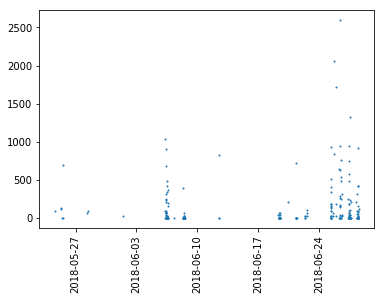

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111) #row-col-num
ax.plot(x,y,ls='None', marker='o', markersize=1)
plt.axis('tight')
plt.xticks(rotation='vertical')

plt.show()

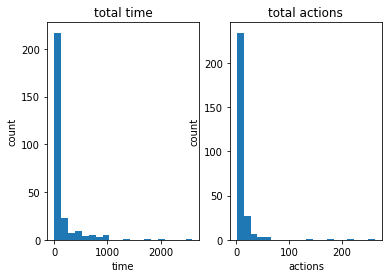

In [134]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(df_user['visit_total_time'], bins=20)
ax1.set_title('total time')
ax1.set_xlabel('time')
ax1.set_ylabel('count')

ax2.hist(df_user['visit_total_actions'], bins=20)
ax2.set_title('total actions')
ax2.set_xlabel('actions')
ax2.set_ylabel('count')

plt.show()

/home/zachclem/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


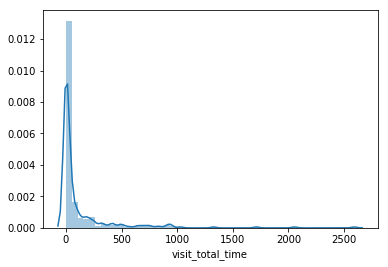

In [135]:
sns.distplot(df_user['visit_total_time'])

In [141]:
df_most_actions = df.sort_values(by='visit_total_actions', ascending = False)
df_most_actions

,idvisit,idsite,idvisitor,visit_last_action_time,user_id,visit_first_action_time,visitor_days_since_first,visitor_days_since_order,visitor_returning,visitor_count_visits,visit_entry_idaction_name,visit_entry_idaction_url,visit_exit_idaction_name,visit_exit_idaction_url,visit_total_actions,visit_total_interactions,visit_total_events,visitor_localtime,visitor_days_since_last,visit_total_time
1537,1538,5,b'\xb4D\xac\x06a?\xc8\xd6',2018-06-25 19:21:26,test1,2018-06-25 18:22:35,0,0,1,2,22,23.0,22,23,1141,24,1117,14:22:09,0,3532
1558,1559,5,b'\xc66=\x85\x18X:\x1a',2018-06-26 07:18:46,bdxfv,2018-06-26 07:01:19,7,0,1,98,22,23.0,30,31,395,2,393,12:30:49,1,1048
1687,1688,5,b'\xd7\xe1\x990\xcc\x1fB\xc2',2018-06-27 18:19:13,sean,2018-06-27 17:45:35,14,0,1,29,22,23.0,41,42,347,8,339,13:45:08,0,2019
1588,1589,5,b'\xb4D\xac\x06a?\xc8\xd6',2018-06-26 14:36:31,test1,2018-06-26 14:25:57,1,0,1,3,22,23.0,30,31,334,12,322,10:25:30,1,635
1383,1384,4,b'\xd7\xe1\x990\xcc\x1fB\xc2',2018-06-22 19:25:47,sean,2018-06-22 19:11:46,9,0,1,30,22,51.0,22,51,272,14,258,15:11:16,1,842
1549,1550,4,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-06-25 21:41:34,test,2018-06-25 21:13:03,0,0,0,1,22,51.0,22,51,263,9,254,17:12:33,0,1712
1559,1560,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-06-26 07:33:15,test,2018-06-26 07:22:30,0,0,0,1,22,23.0,38,39,214,6,208,12:52:02,0,646
1532,1533,5,b'\xa9J\x8f\xe5\xcc\xb1\x9b\xa6',2018-06-25 18:21:46,test,2018-06-25 17:47:33,0,0,0,1,22,23.0,22,23,172,31,141,13:47:06,0,2054
1730,1731,5,b'\xaaw\xd5\xde%\xb1\xf3\xe0',2018-06-28 12:25:31,tesat,2018-06-28 12:18:03,9,0,1,145,22,23.0,30,31,167,14,153,17:47:34,0,449
1541,1542,7,b'\xb3\xfdU\xb3\xf1\x88:\xd3',2018-06-25 20:51:25,kien,2018-06-25 20:15:34,0,0,1,3,22,130.0,22,130,164,21,143,16:15:08,0,2152


In [142]:
df_most_actions.iloc[0, :]

idvisit                                            1538
idsite                                                5
idvisitor                    b'\xb4D\xac\x06a?\xc8\xd6'
visit_last_action_time              2018-06-25 19:21:26
user_id                                           test1
visit_first_action_time             2018-06-25 18:22:35
visitor_days_since_first                              0
visitor_days_since_order                              0
visitor_returning                                     1
visitor_count_visits                                  2
visit_entry_idaction_name                            22
visit_entry_idaction_url                             23
visit_exit_idaction_name                             22
visit_exit_idaction_url                              23
visit_total_actions                                1141
visit_total_interactions                             24
visit_total_events                                 1117
visitor_localtime                       0 days 1

In [139]:
df.groupby(['idsite']).agg({'idsite': 'count'})

,idsite
idsite,
1,581
4,249
5,826
6,13
7,45
8,20


In [144]:
#visit_total_time is in seconds. Divide by 60 to get total time in minutes
df_most_actions.iloc[0, :]['visit_total_time']/60

58.866666666666667

In [145]:
df['visitor_days_since_last'].describe()

count    1734.000000
mean        0.133795
std         0.865095
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.000000
Name: visitor_days_since_last, dtype: float64

In [153]:
df_scatter = df.groupby(['idvisitor']).agg({'visitor_days_since_last': 'mean', 'idvisitor': 'count'}).sort_values(by='visitor_days_since_last', ascending=False)

In [161]:
df_scatter.describe()

,visitor_days_since_last,idvisitor
count,174.000000,174.000000
mean,0.109053,9.965517
std,0.630708,27.965482
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,6.750000
max,7.250000,277.000000


In [154]:
x = df_scatter['idvisitor'] 

In [155]:
y = df_scatter['visitor_days_since_last']

Text(0,0.5,'average days since last visit')

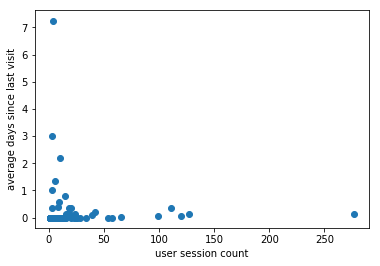

In [159]:
#174 points
plt.scatter(x,y)
plt.title('')
plt.xlabel('user session count')
plt.ylabel('average days since last visit')

In [ ]:
#users are Matomo users


In [36]:
df_test = df[df['idsite']==1]
df_test['user_id'].unique()

array([None], dtype=object)